## Game Data exploration

Date: 10/24/2020

#### Table of Contents
- Imports
- Examine Variables

### Imports and Initial Setup

In [ ]:
from data.db import nbaDB
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [ ]:
user = os.environ["dbName"]
pw = os.environ["dbPass"]

db = nbaDB(user, pw)


In [ ]:
df = db.get_game_stats()

In [ ]:
df.shape

In [ ]:
df.head()

#### Validate Data

### Variable Exploration

In [26]:
df[df["home_wins"] == -1]

,date,season,home_wins,home_losses,away_wins,away_losses,team_home,fgm_home,fga_home,fg_per_home,...,oreb_per_away,dreb_per_away,reb_per_away,ast_per_away,stl_per_away,blk_per_away,tov_per_away,usg_per_away,off_rating_away,def_rating_away
54,2001-10-30,01-02,-1,1,1,-1,CLE,39,90,0.433,...,25.6,84.4,57.1,66.7,6.2,2.7,12.9,100.0,111.6,92.0
657,2002-11-02,02-03,-1,3,3,-1,MEM,41,87,0.471,...,26.2,82.9,54.2,68.2,8.9,12.3,11.6,100.0,114.8,98.0
665,2002-10-30,02-03,-1,1,2,-1,MIA,36,78,0.462,...,25.7,78.4,52.8,56.4,5.9,2.7,13.9,100.0,118.6,102.0
1848,2004-04-25,03-04,-1,4,4,-1,MEM,36,75,0.480,...,21.4,67.6,47.7,67.6,10.5,6.8,16.1,100.0,128.4,113.2
1887,2004-05-04,03-04,-1,1,1,-1,MIN,39,88,0.443,...,21.4,66.7,44.8,62.9,14.0,9.5,8.6,100.0,111.8,105.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23681,2019-04-28,18-19,-1,1,1,-1,MIL,31,89,0.348,...,7.5,87.3,53.7,53.2,4.1,22.0,9.9,100.0,113.9,91.5
23707,1990-11-02,90-91,-1,1,1,-1,UTA,36,81,0.444,...,25.6,65.9,45.2,63.0,14.3,3.9,10.1,100.0,113.6,91.7
23715,1990-11-15,90-91,-1,6,4,1,SAC,37,80,0.463,...,25.6,77.3,53.0,77.8,16.9,7.8,14.1,100.0,114.5,87.3
23754,1990-11-06,90-91,-1,3,1,1,ORL,33,96,0.344,...,17.6,67.8,49.5,74.4,8.5,16.1,19.0,100.0,96.1,89.5


In [59]:
df.columns


Index(['date', 'season', 'home_wins', 'home_losses', 'away_wins',
       'away_losses', 'team_home', 'fgm_home', 'fga_home', 'fg_per_home',
       'x3pa_home', 'x3pm_home', 'x3p_per_home', 'fta_home', 'ftm_home',
       'ft_per_home', 'orebs_home', 'drebs_home', 'rebounds_home',
       'assists_home', 'steals_home', 'blocks_home', 'turnovers_home',
       'fouls_home', 'points_home', 'x1q_pts_home', 'x2q_pts_home',
       'x3q_pts_home', 'x4q_pts_home', 'ot_pts_home', 'pace_home',
       'efg_per_home', 'ft_per_fga_home', 'ts_per_home', 'x3p_ar_home',
       'ft_ar_home', 'oreb_per_home', 'dreb_per_home', 'reb_per_home',
       'ast_per_home', 'stl_per_home', 'blk_per_home', 'tov_per_home',
       'usg_per_home', 'off_rating_home', 'def_rating_home', 'team_away',
       'fgm_away', 'fga_away', 'fg_per_away', 'x3pa_away', 'x3pm_away',
       'x3p_per_away', 'fta_away', 'ftm_away', 'ft_per_away', 'orebs_away',
       'drebs_away', 'rebounds_away', 'assists_away', 'steals_away',
       'b

In [60]:
# Generate which team one for plots
df["winner"] = df["points_home"] > df["points_away"]
df["winner"] = df["winner"].apply(lambda x: "HOME" if x is True else "Away")

[Text(0.5, 0, 'Home True Shooting %'),
 Text(0, 0.5, 'Away True Shooting %'),
 Text(0.5, 1.0, 'True Shooting %')]

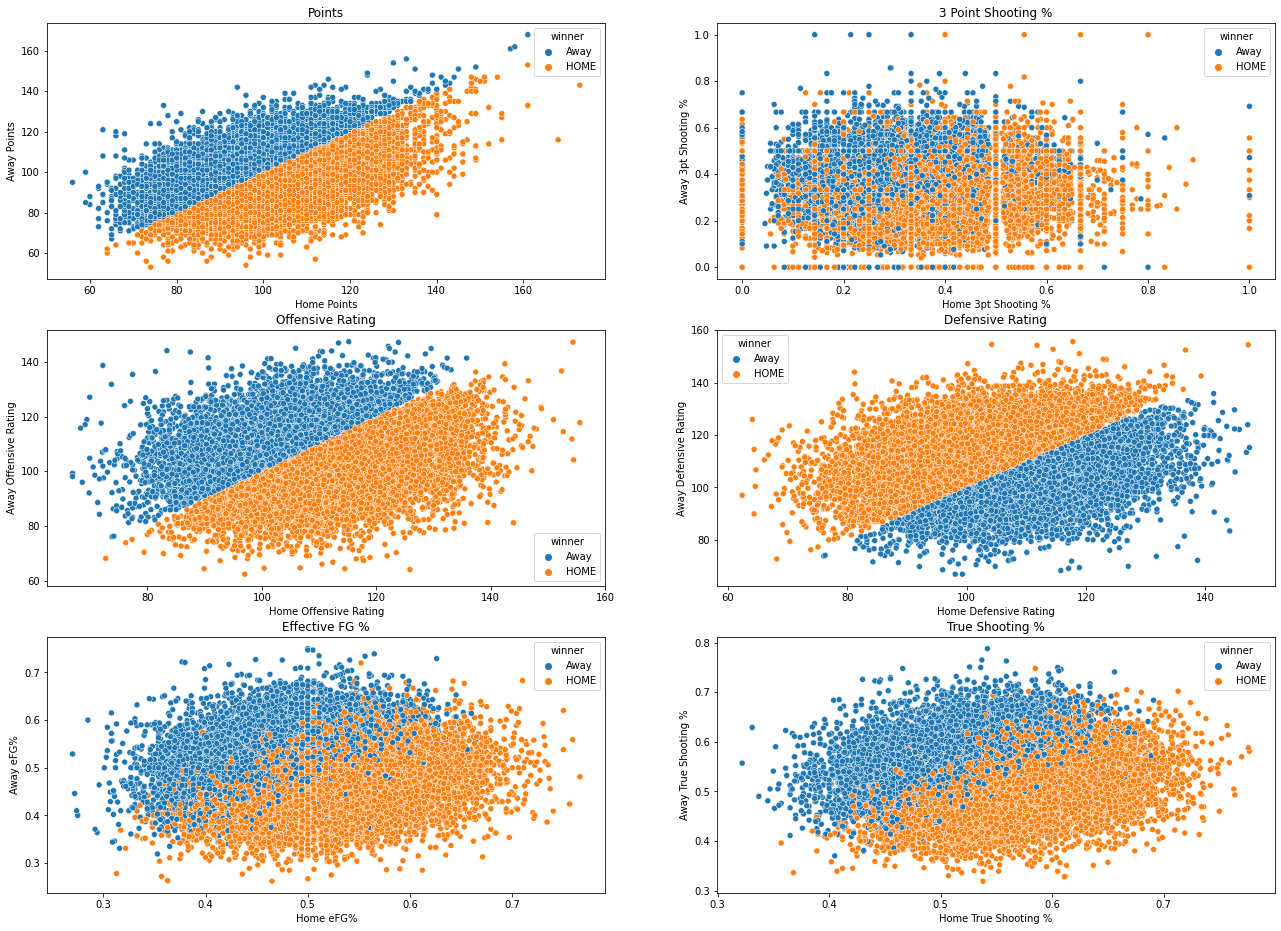

In [73]:
_, ((ax1,ax2), (ax3,ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize = (22,16))
sns.scatterplot(data = df, x = df["points_home"], y = df["points_away"], hue = df["winner"], ax = ax1)
ax1.set(xlabel = "Home Points", ylabel = "Away Points", title = "Points")
sns.scatterplot(data = df, x = df["x3p_per_home"], y = df["x3p_per_away"], hue = df["winner"], ax = ax2)
ax2.set(xlabel = "Home 3pt Shooting %", ylabel = "Away 3pt Shooting %", title = "3 Point Shooting %")
sns.scatterplot(data = df, x = df["off_rating_home"], y = df["off_rating_away"], hue = df["winner"], ax = ax3)
ax3.set(xlabel = "Home Offensive Rating", ylabel = "Away Offensive Rating", title = "Offensive Rating")
sns.scatterplot(data = df, x = df["def_rating_home"], y = df["def_rating_away"], hue = df["winner"], ax = ax4)
ax4.set(xlabel = "Home Defensive Rating", ylabel = "Away Defensive Rating", title = "Defensive Rating")
sns.scatterplot(data = df, x = df["efg_per_home"], y = df["efg_per_away"], hue = df["winner"], ax = ax5)
ax5.set(xlabel = "Home eFG%", ylabel = "Away eFG%", title = "Effective FG %")
sns.scatterplot(data = df, x = df["ts_per_home"], y = df["ts_per_away"], hue = df["winner"], ax = ax6)
ax6.set(xlabel = "Home True Shooting %", ylabel = "Away True Shooting %", title = "True Shooting %")

[Text(0.5, 0, 'Home Rebound'),
 Text(0, 0.5, 'Away Rebound'),
 Text(0.5, 1.0, 'Rebounds')]

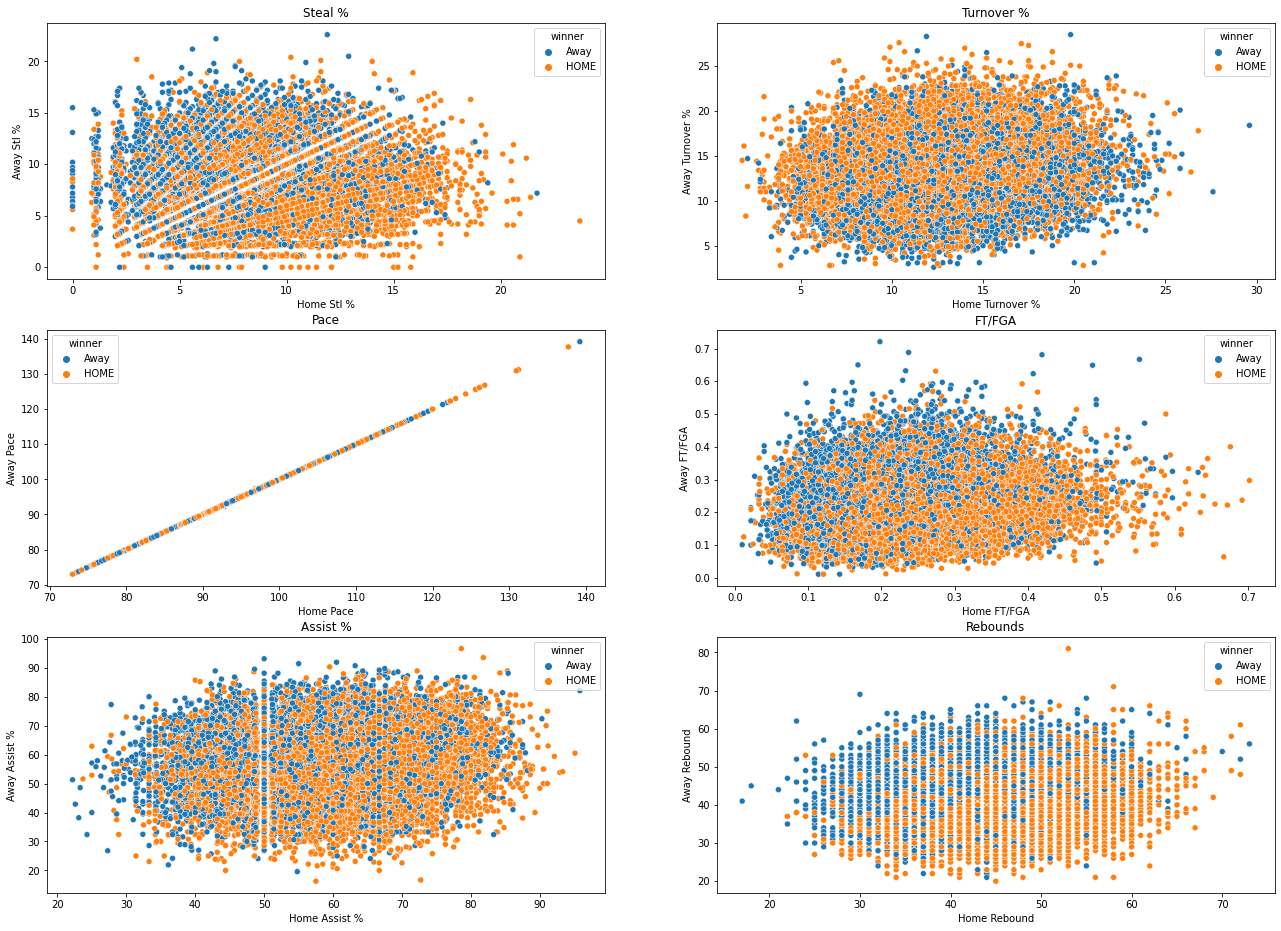

In [78]:
_, ((ax1,ax2), (ax3,ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize = (22,16))
sns.scatterplot(data = df, x = df["stl_per_home"], y = df["stl_per_away"], hue = df["winner"], ax = ax1)
ax1.set(xlabel = "Home Stl %", ylabel = "Away Stl %", title = "Steal %")
sns.scatterplot(data = df, x = df["tov_per_home"], y = df["tov_per_away"], hue = df["winner"], ax = ax2)
ax2.set(xlabel = "Home Turnover %", ylabel = "Away Turnover %", title = "Turnover %")
sns.scatterplot(data = df, x = df["pace_home"], y = df["pace_away"], hue = df["winner"], ax = ax3)
ax3.set(xlabel = "Home Pace", ylabel = "Away Pace", title = "Pace")
sns.scatterplot(data = df, x = df["ft_per_fga_home"], y = df["ft_per_fga_away"], hue = df["winner"], ax = ax4)
ax4.set(xlabel = "Home FT/FGA", ylabel = "Away FT/FGA", title = "FT/FGA")
sns.scatterplot(data = df, x = df["ast_per_home"], y = df["ast_per_away"], hue = df["winner"], ax = ax5)
ax5.set(xlabel = "Home Assist %", ylabel = "Away Assist %", title = "Assist %")
sns.scatterplot(data = df, x = df["rebounds_home"], y = df["rebounds_away"], hue = df["winner"], ax = ax6)
ax6.set(xlabel = "Home Rebound", ylabel = "Away Rebound", title = "Rebounds")